# Data Science Books Recommendation 

### Web Scraping and EDA Project
<hr>

#### 1 Introduction

     1.1 Project Goal
     1.2 Tools
     1.3 Web Scraping
     1.4 Features
    
#### 2 Exploratory Analysis
    
    2.1 Pre-Processing
    2.2 Inspecting Features
    2.3 Exploring Authors
    2.4 Most Rated and Most Popular Books

#### 3 Most Recommended Books

    3.1 Top 10 Most Recommended Books in Data Science
    3.2 Getting Books From The Recommended List

#### 4 Takeaways


# 1 Introduction

### 1.1 Project Goal

This was my first project with Web Scraping. Therefore, the main goal was to learn  and practice how to extract Data from websites and perform exploratory analysis.

I chose this topic because I was very interested in Data Science books and wanted to make a good recommendation list for aspiring Data Scientists.

### 1.2 Tools

* Python 3.7
* BeautifulSoap
* Pandas
* Matplotlib
* Seaborn

### 1.3 Web Scraping

The data was extracted from the website Goodreads, using BeautifulSoap. Goodreads is one of the world’s most influential reading sites, providing a platform for people interested in talking about books.

I scraped 50 webpages containing books about Data Science and created a data set with 995 entries, using Pandas.

The source code can be found <a href='scraping_books.py'>HERE!</a>

### 1.4 Features

* Title 
* Author(s)
* Avg. Rating (average rating) 
* Num. of Ratings (total number of ratings) 
* Editions (total number of editions)
* Published Year 

## 2 Exploratory Analysis

### 2.1 Pre-Processing

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataScience_books.csv')

##### Checking and Cleaning the Data

In [3]:
df.info

<bound method DataFrame.info of                                                  Title  \
0    Data Science for Business: What you need to kn...   
1    Data Smart: Using Data Science to Transform In...   
2    Data Science from Scratch: First Principles wi...   
3                                   Doing Data Science   
4    R for Data Science: Import, Tidy, Transform, V...   
..                                                 ...   
991  Data Science and Advanced Analytics A Complete...   
992  Data science pour l'entreprise: Principes fond...   
993  Machine Learning for Beginners: Your Ultimate ...   
994  Most Commonly Asked Data Science Questions and...   
995  Exam Ref Dp-100 Designing and Implementing a D...   

                                   Author(s)  Published Year  Editions  \
0          ['Foster Provost', 'Tom Fawcett']            2013        13   
1                        ['John W. Foreman']            2013        15   
2                              ['Joel Grus']     

**Based on the general information above, I decided to:**

  * convert the variable's data type to numeric values;
  * remove commas and brackets from Num. of Ratings and Author(s)    columns, respectively;
  * drop duplicated rows;
  * select only books with at least 1 Rating;
  * create a new column with BookID to facilitate further analysis;
  * create a new column with Weighted Rating.
  
**Weighted Rating:**

<em>Avg. Rating * Num. of Ratings</em>

I calculated the weighted rating to get a better classification for books ratings!

In [4]:
# changing datatypes
df['Published Year'] = pd.to_numeric(df['Published Year'])
df['Editions'] = pd.to_numeric(df['Editions'], downcast='float')
df['Avg. Rating'] = pd.to_numeric(df['Avg. Rating'])

# removing commas and changing datatype for Num. of Ratings
df['Num. of Ratings'] = df['Num. of Ratings'].apply(lambda x: re.sub('[\,]', '', x))
df['Num. of Ratings'] = pd.to_numeric(df['Num. of Ratings'], downcast='float')

# removing brackets of Author's names
df['Author(s)'] = df['Author(s)'].apply(lambda x: re.sub('[\[\]\'\'\"]', '', x))

# stardardizing all titles
df['Title'] = df['Title'].apply(lambda x: x.capitalize())

# dropppinh duplicate rows
df.drop_duplicates(keep='last', inplace=True)

# selecting only rows with at least 1 Rating
df = df[df['Num. of Ratings'] != 0]

# creating a new column for Weighted Avg to be used later
df['Weighted Rating'] = df['Avg. Rating'] * df['Num. of Ratings']

# creating BookID column
r1, r2 = 1, 561
df['BookID'] = np.arange(r1, r2+1, 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 950
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            561 non-null    object 
 1   Author(s)        561 non-null    object 
 2   Published Year   561 non-null    int64  
 3   Editions         561 non-null    float32
 4   Avg. Rating      561 non-null    float64
 5   Num. of Ratings  561 non-null    float32
 6   Weighted Rating  561 non-null    float64
 7   BookID           561 non-null    int64  
dtypes: float32(2), float64(2), int64(2), object(2)
memory usage: 35.1+ KB


Now, I left 8 variables, 561 entries, 0 NA values, and dropped duplicated rows.

In [6]:
df.head()

,Title,Author(s),Published Year,Editions,Avg. Rating,Num. of Ratings,Weighted Rating,BookID
0,Data science for business: what you need to kn...,"Foster Provost, Tom Fawcett",2013,13.0,4.16,1643.0,6834.88,1
1,Data smart: using data science to transform in...,John W. Foreman,2013,15.0,4.15,863.0,3581.45,2
2,Data science from scratch: first principles wi...,Joel Grus,2015,20.0,3.93,690.0,2711.70,3
3,Doing data science,"Rachel Schutt, Cathy ONeil",2013,9.0,3.72,496.0,1845.12,4
4,"R for data science: import, tidy, transform, v...","Hadley Wickham, Garrett Grolemund",2016,13.0,4.60,540.0,2484.00,5


##### Using heatmap to visualize missing values

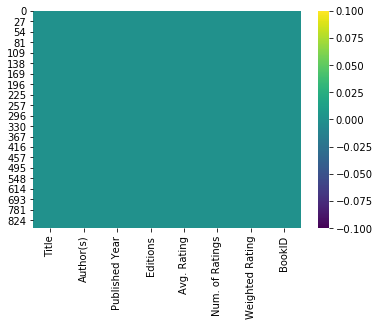

In [7]:
sns.heatmap(df.isnull(), cmap='viridis');

### 2.2 Inspecting Features

##### Checking the distribution

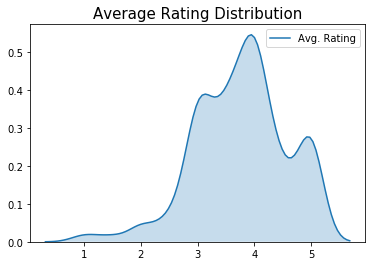

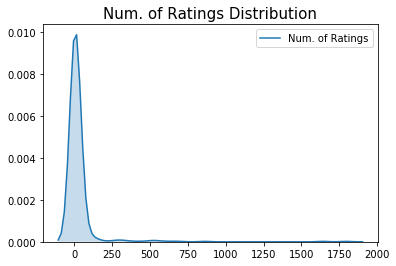

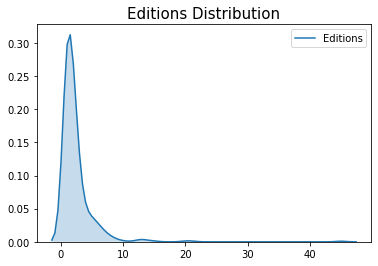

In [8]:
plt.figure()
sns.kdeplot(df['Avg. Rating'], shade = True)
plt.title('Average Rating Distribution',fontsize=15)

plt.figure()
sns.kdeplot(df['Num. of Ratings'], shade = True)
plt.title('Num. of Ratings Distribution',fontsize=15)

plt.figure()
sns.kdeplot(df['Editions'], shade = True)
plt.title('Editions Distribution',fontsize=15);

As we can see in the plots above:

* the Average Rating is most distributed between 3.0 and 4.2
* most books have less than 100 Ratings
* most books are up to 5 editions

##### Degree of relationship using heatmap

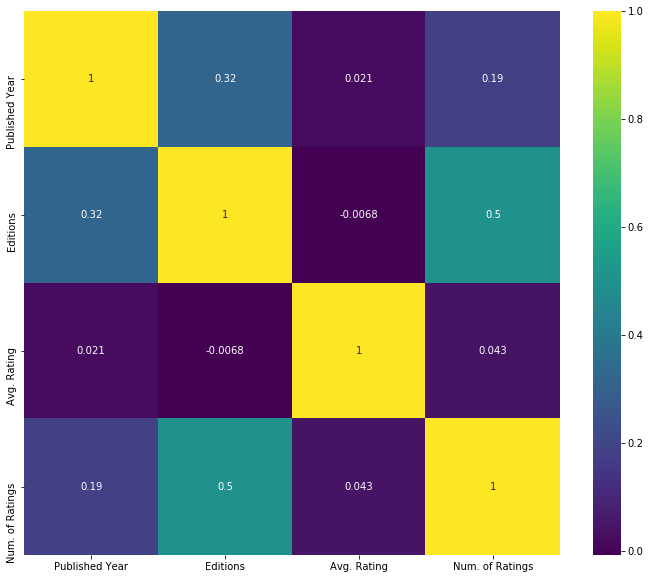

In [9]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.drop(df[['BookID', 'Weighted Rating']], axis=1).corr(), cmap='viridis', annot=True);

Checking all features we can see a moderate correlation between number of editions and number of ratings. However, in general, the variables don't seem to have a strong relationship. 

##### Checking linear correlation between Num. of Ratings and Editions

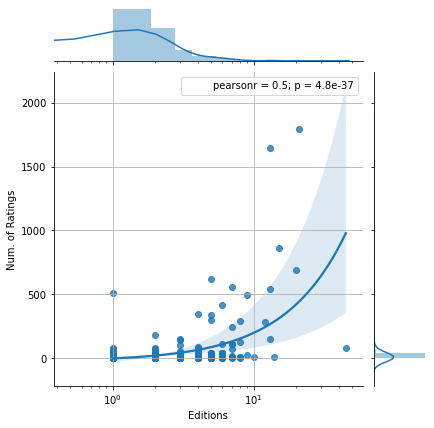

In [10]:
from scipy.stats import pearsonr

sns.jointplot(x='Editions', y='Num. of Ratings', data=df, stat_func=pearsonr, kind='reg')
plt.grid()

# log transformation to editions
plt.xscale('log')

We can see a moderate positive correlation between the two variables, meaning that an increase in the number of editions positively affects the number of ratings. This makes sense since more editions mean that books are reaching more people. 

### 2.3 Exploring Author(s)

**<em>Creating a function to make a new dataframe separating co-authors</em>**

This way I can calculate how many books each author wrote

In [11]:
def authors_df(author, feature):
    authors = author.map(lambda x: x.split(','))
    features = feature
    
    auth_feature = list(map(lambda tuple_auth_feature: 
                     list(map(lambda i: (i, tuple_auth_feature[1]), tuple_auth_feature[0])),
                     zip(authors, features)))
    
    flat_list = []
    for sublist in auth_feature:
        for item in sublist:
            flat_list.append(item)
    
    flat_list = set(flat_list)
    
    authors = list(map(lambda i: i[0], flat_list))
    features = list(map(lambda i: i[1], flat_list))
    df_auth_feature = pd.DataFrame({'Authors': authors, 'Feature': features})
    
    return df_auth_feature

##### Authors who wrote most books

In [12]:
# calling the function to create a new dataframe with the individual authors
most_books = authors_df(df['Author(s)'], df['Title'])

# selecting the top 10 by counting the books
top_20_most_books = pd.crosstab(index=most_books['Authors'],columns='count').sort_values(['count'], 
                                                            ascending=False).reset_index().head(20)

##### Most popular author(s)

The most popular are the ones with higher Num. of Ratings

In [13]:
most_popular = authors_df(df['Author(s)'], df['Num. of Ratings'])
top_20_most_popular = most_popular.groupby(['Authors'])['Feature'].sum().sort_values(
                            ascending=False).reset_index('Authors').head(20)

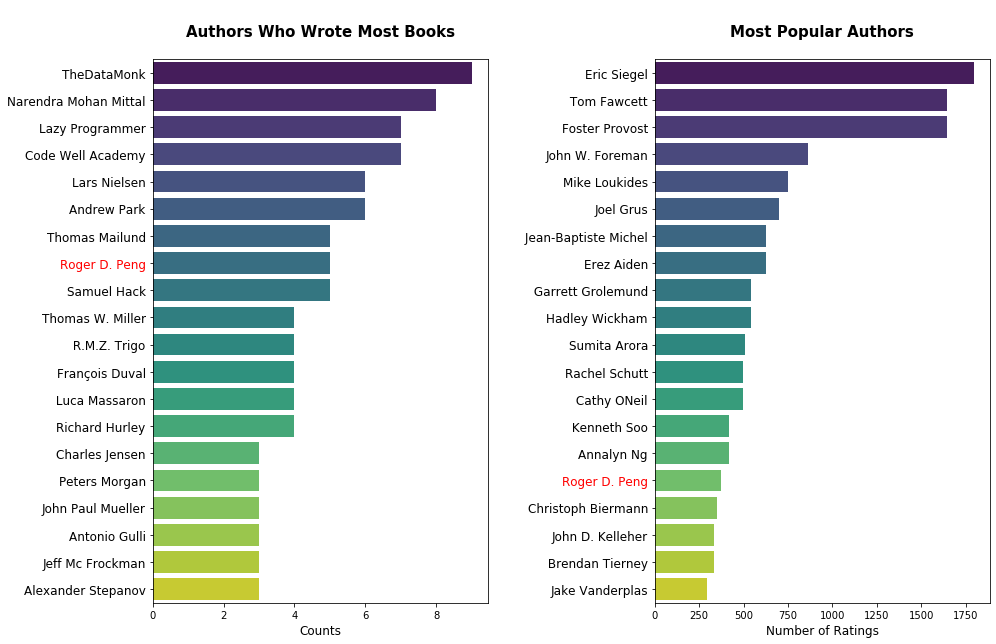

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
ax = sns.barplot(top_20_most_books['count'], top_20_most_books['Authors'], palette = 'viridis')
plt.ylabel('')
plt.xlabel('Counts', fontsize=12)
plt.yticks(fontsize=12)
plt.title('\nAuthors Who Wrote Most Books\n', fontsize=15, fontweight='bold')
ax.get_yticklabels()[7].set_color("red")


plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace = 0.5)
ax2 = sns.barplot(top_20_most_popular['Feature'], top_20_most_popular['Authors'], palette = 'viridis')
plt.ylabel('')
plt.xlabel('Number of Ratings', fontsize=12)
plt.yticks(fontsize=12)
plt.title('\nMost Popular Authors\n', fontsize=15, fontweight='bold')
ax2.get_yticklabels()[15].set_color("red");

As we can see above, the number of books each author wrote didn't interfere in their popularity.

Roger D. Peng is the only author to appears in both categories.

### 2.4 Most Rated and Most Popular Books

* Most Rated Books: as the name suggests, this is a list with the top 10 books with higher average ratings;

* Most Popular Books: list with the top 10 books with a higher total number of ratings.

In [15]:
most_rated_books = df[['BookID', 'Avg. Rating']].sort_values(by='Avg. Rating', 
                                                        ascending=False).set_index('BookID').head(10)
most_popular_books = df[['BookID', 'Num. of Ratings']].sort_values(by='Num. of Ratings', 
                                                            ascending=False).set_index('BookID').head(10)

# using set_table_attributes to display two dataframes side by side

from IPython.display import display_html 

# creating a function to highlight Books ID in table

def highlight_cols(s):
    color = 'red'
    return 'background-color: %s' % color

# applying styles and displaying

df1_styler = most_rated_books.reset_index().style.set_table_attributes(
                    "style='display:inline'").set_caption('Most Rated Books').applymap(highlight_cols, 
                    subset=pd.IndexSlice[:, ['BookID']]).format({'Avg. Rating': '{:,.1f}'})

df2_styler = most_popular_books.reset_index().style.set_table_attributes(
                        "style='display:inline'").set_caption('Most Popular Books').applymap(highlight_cols, 
                        subset=pd.IndexSlice[:, ['BookID']]).format({'Num. of Ratings': '{:,.1f}'})

display_html(df1_styler._repr_html_() + ' ' + df2_styler._repr_html_(), raw=True)

,BookID,Avg. Rating
0,281,5.0
1,427,5.0
2,407,5.0
3,408,5.0
4,283,5.0
5,409,5.0
6,282,5.0
7,423,5.0
8,424,5.0
9,113,5.0


We can see in the tables above that the most rated books are not the most popular. They have a higher average rating but do not have higher numbers of ratings. This is expected since more Ratings lead to more critical and different opinions. 

## 3 Most Recommended Books

### 3.1 Top 10 Most Recommended Books in Data Science

To have a better selection of the recommended books I previously calculated the **Weighted Rating (Avg. Rating * Num. of Ratings)**.

In this way, I can make a list of recommended books in Data Science considering the Avg Rating and the Number of Ratings each one received.

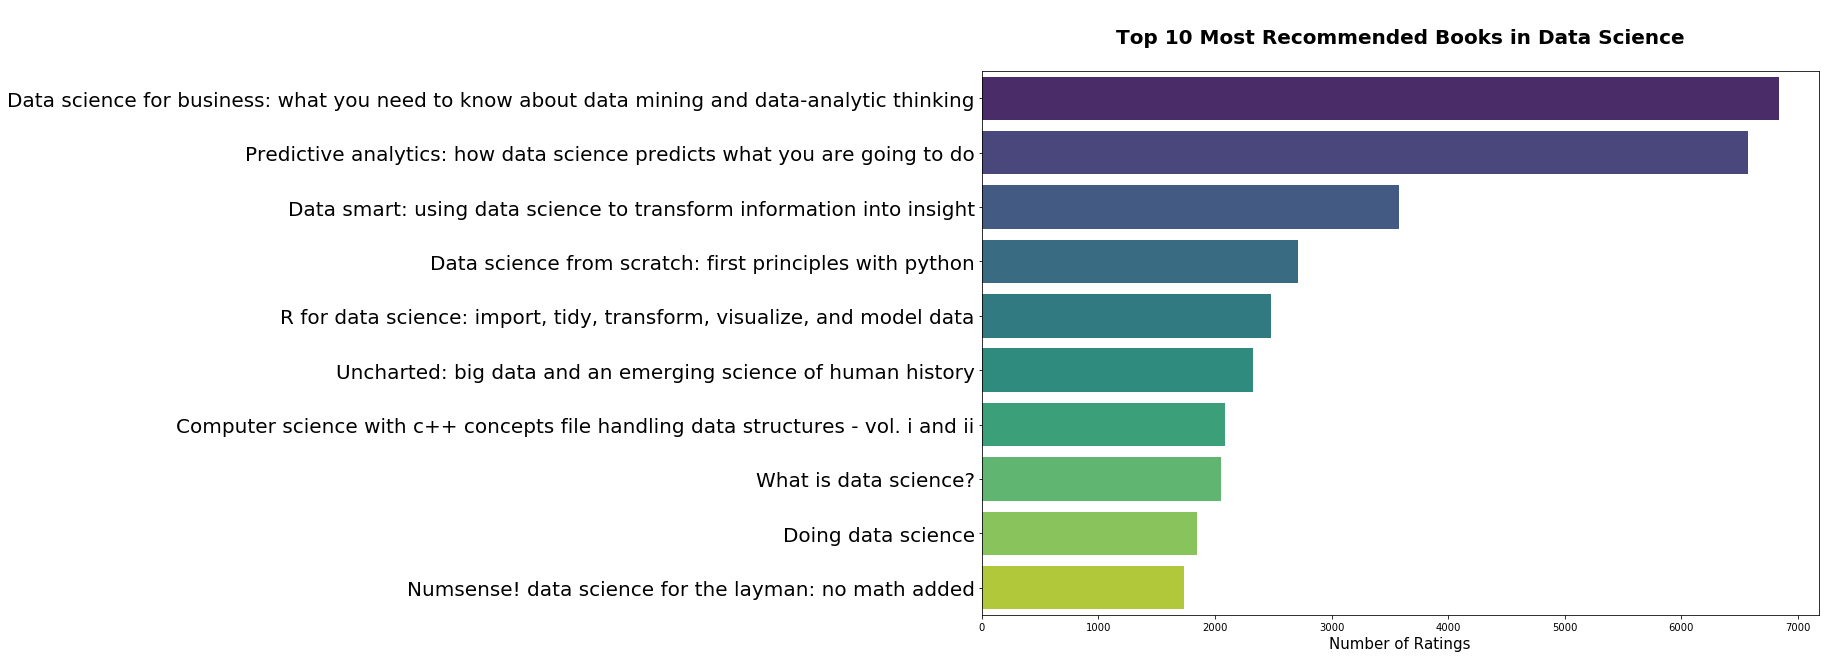

In [16]:
most_recommended = df.sort_values(by='Weighted Rating', ascending=False).set_index('Title').head(10)

plt.figure(figsize=(15,10))
sns.barplot(most_recommended['Weighted Rating'], most_recommended.index, palette = 'viridis')
plt.ylabel('')
plt.xlabel('Number of Ratings', fontsize=15)
plt.yticks(fontsize=20)
plt.title('\nTop 10 Most Recommended Books in Data Science\n', fontsize=20, fontweight='bold');

In [22]:
# making a table with all information about the top 10 books

print("\n\nMost Recommended Books in Data Science Based on Goodreads Reviews")
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '12px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7ffff')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '12px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

most_recommended.drop(most_recommended[['Weighted Rating', 'BookID']],axis=1).reset_index().style.set_table_styles(
                                        styles).format({'Avg. Rating': '{:.1f}',
                                                        'Num. of Ratings': '{:,.0f}', 
                                                        'Editions': '{:.0f}', 
                                                        'Published Year': '{:.0f}'})



Most Recommended Books in Data Science Based on Goodreads Reviews


,Title,Author(s),Published Year,Editions,Avg. Rating,Num. of Ratings
0,Data science for business: what you need to know about data mining and data-analytic thinking,"Foster Provost, Tom Fawcett",2013,13,4.2,"1,643"
1,Predictive analytics: how data science predicts what you are going to do,Eric Siegel,2013,21,3.7,"1,796"
2,Data smart: using data science to transform information into insight,John W. Foreman,2013,15,4.2,863
3,Data science from scratch: first principles with python,Joel Grus,2015,20,3.9,690
4,"R for data science: import, tidy, transform, visualize, and model data","Hadley Wickham, Garrett Grolemund",2016,13,4.6,540
5,Uncharted: big data and an emerging science of human history,"Erez Aiden, Jean-Baptiste Michel",2013,5,3.7,623
6,Computer science with c++ concepts file handling data structures - vol. i and ii,Sumita Arora,0,1,4.1,507
7,What is data science?,Mike Loukides,2011,7,3.7,556
8,Doing data science,"Rachel Schutt, Cathy ONeil",2013,9,3.7,496
9,Numsense! data science for the layman: no math added,"Annalyn Ng, Kenneth Soo",0,6,4.2,419


### 3.2 Getting Books from Recommended List

I created a table with the estimated prices and links to get the books from the top 10 list.

In [18]:
# List with prices and links

data = ['https://www.amazon.com/-/pt/Data-Science-Business-Data-Analytic-Thinking-dp-1449361323', 
        'https://www.amazon.com/Predictive-Analytics-Power-Predict-Click/dp/1118356853',
       'https://www.amazon.com/Data-Smart-Science-Transform-Information-dp-111866146X/dp/111866146X/ref=mt_paperback?_encoding=UTF8&me=&qid=1590649783',
       'https://www.amazon.com/Data-Science-Scratch-Principles-Python-dp-1492041130/dp/1492041130/ref=mt_paperback?_encoding=UTF8&me=&qid=1590650132',
        'https://www.amazon.com/Data-Science-Transform-Visualize-Model-dp-1491910399/dp/1491910399/ref=mt_paperback?_encoding=UTF8&me=&qid=1590650255',
        'https://www.amazon.com/Uncharted-Data-Lens-Human-Culture/dp/1594632901',
        'https://www.inamebooks.com/book/show/25449409-computer-science-with-c-concepts-file-handling-data-structures-vol-amp-qid-5icmue8njq-amp-rank-46',
        'https://www.amazon.com/What-Data-Science-Mike-Loukides-ebook/dp/B007R8BHAK',
        'https://www.amazon.com/Doing-Data-Science-Straight-Frontline/dp/1449358659',
        'https://www.amazon.com/Numsense-Data-Science-Layman-Added/dp/9811110689/ref=tmm_pap_swatch_0?_encoding=UTF8&qid=1590651218&sr=1-1']
        
        
        
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)


prices = ['EUR 22.54', 'EUR 20.62', 'EUR 13.24', 'EUR 33.91', 'EUR 25.09', 'EUR 12.11', 'Free Download',
         'Free (Kindle)', 'EUR 15.26', 'EUR 25.41']


google_play = ['https://play.google.com/store/books/details/Foster_Provost_Data_Science_for_Business?id=4ZctAAAAQBAJ']
to_buy = pd.DataFrame({
    'Book': most_recommended.index,
    'Author(s)': most_recommended['Author(s)'],
    'Price': prices,
    'Where to Get': data})

print("\n\nGetting Books from Recommended List")

to_buy.reset_index().drop('Title', axis=1).style.set_table_styles(styles).format({'Where to Get': make_clickable})



Getting Books from Recommended List


,Book,Author(s),Price,Where to Get
0,Data science for business: what you need to know about data mining and data-analytic thinking,"Foster Provost, Tom Fawcett",EUR 22.54,https://www.amazon.com/-/pt/Data-Science-Business-Data-Analytic-Thinking-dp-1449361323
1,Predictive analytics: how data science predicts what you are going to do,Eric Siegel,EUR 20.62,https://www.amazon.com/Predictive-Analytics-Power-Predict-Click/dp/1118356853
2,Data smart: using data science to transform information into insight,John W. Foreman,EUR 13.24,https://www.amazon.com/Data-Smart-Science-Transform-Information-dp-111866146X/dp/111866146X/ref=mt_paperback?_encoding=UTF8&me=&qid=1590649783
3,Data science from scratch: first principles with python,Joel Grus,EUR 33.91,https://www.amazon.com/Data-Science-Scratch-Principles-Python-dp-1492041130/dp/1492041130/ref=mt_paperback?_encoding=UTF8&me=&qid=1590650132
4,"R for data science: import, tidy, transform, visualize, and model data","Hadley Wickham, Garrett Grolemund",EUR 25.09,https://www.amazon.com/Data-Science-Transform-Visualize-Model-dp-1491910399/dp/1491910399/ref=mt_paperback?_encoding=UTF8&me=&qid=1590650255
5,Uncharted: big data and an emerging science of human history,"Erez Aiden, Jean-Baptiste Michel",EUR 12.11,https://www.amazon.com/Uncharted-Data-Lens-Human-Culture/dp/1594632901
6,Computer science with c++ concepts file handling data structures - vol. i and ii,Sumita Arora,Free Download,https://www.inamebooks.com/book/show/25449409-computer-science-with-c-concepts-file-handling-data-structures-vol-amp-qid-5icmue8njq-amp-rank-46
7,What is data science?,Mike Loukides,Free (Kindle),https://www.amazon.com/What-Data-Science-Mike-Loukides-ebook/dp/B007R8BHAK
8,Doing data science,"Rachel Schutt, Cathy ONeil",EUR 15.26,https://www.amazon.com/Doing-Data-Science-Straight-Frontline/dp/1449358659
9,Numsense! data science for the layman: no math added,"Annalyn Ng, Kenneth Soo",EUR 25.41,https://www.amazon.com/Numsense-Data-Science-Layman-Added/dp/9811110689/ref=tmm_pap_swatch_0?_encoding=UTF8&qid=1590651218&sr=1-1


**Prices may have changed since this publication.

## 4 Takeaways

In summary, this project highlighted information about Data Science books based on reviews from Goodreads, including:

* Authors who wrote most books and the most popular ones;
* Most rated and most popular books (based on the average rating and total number of ratings);
* A list of the most recommended books (based on the weighted number of ratings);
* A list with the top 10 most recommended books, prices, and links to purchase them.

Upon inspection of all features I found a moderate linear correlation between Editions (total number of editions) and Num. of Ratings (total number of ratings). However, it was not possible to correlate other features. Even though this was not the project's goal, I'm interested in keep exploring these features.
A few things I have in mind are:

* Get more features from the website (such as number of pages and number of written reviews);
* Separate the Data in categories (low and high ratings), so I can remove outliers, study the relationship of the features of each category, and develop a model to predict whether a book is highly recommended.

For now, I am happy with the obtained results, since the main purpose of this study was to practice web scraping and exploratory data analysis.

Besides, I now have a good book list to start exploring and hope this can help others as well.